In [45]:
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
import numpy as np

# Test Calibration

In [46]:
f = pyfits.open('Calibratetest.fits')
firstPolar = f[1].data['auto0_real']
#plt.plot(firstPolar)
#plt.show()

In [47]:
online = np.array([])
for i in range (1,11):
    online = np.append(online, f[i].data['auto0_real'])

In [48]:
online.shape = (10,-1)

In [49]:
e = online.mean(0)

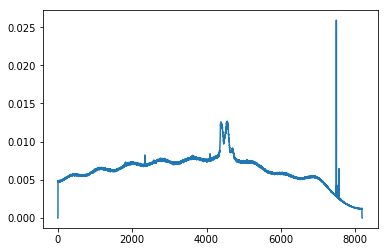

In [50]:
plt.plot(e)
plt.show()

# Upper and Lower Calibrations

In [51]:
upper = pyfits.open('Calibrateupper.fits')
lower = pyfits.open('Calibratelower.fits')
Up = np.array([])
Low = np.array([])
for i in range (1,11):
    Up = np.append(Up, upper[i].data['auto0_real'])
    Low = np.append(Low, lower[i].data['auto0_real'])
Up.shape = (10,-1)
Low.shape = (10,-1)

UpAvg = Up.mean(0)
LowAvg = Low.mean(0)

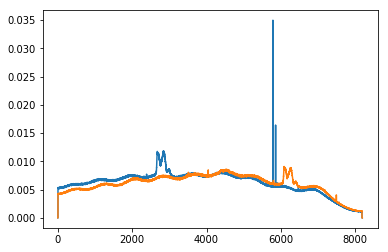

In [52]:
plt.plot(UpAvg)
plt.plot(LowAvg)
plt.show()

/Users/costassoler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/costassoler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


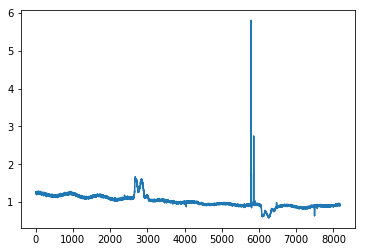

In [53]:
plt.plot(UpAvg/LowAvg)
plt.show()

/Users/costassoler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/costassoler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


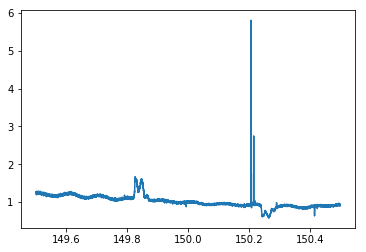

In [54]:
timestep = 1
freqs = np.fft.fftfreq(len(UpAvg),timestep)+150

plt.plot(freqs,np.fft.fftshift(UpAvg/LowAvg))
plt.show()

# Map Data FOURIER FILTER:

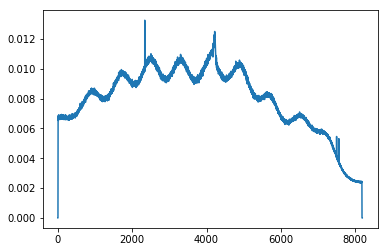

In [55]:
Data = pyfits.open('TestMap_220.0_-12.0.fits')

D = np.array([])

for i in range (1,11):
    D = np.append(D, Data[i].data['auto0_real'])
    
D.shape = (10,-1)

DAvg = D.mean(0)
plt.plot(DAvg)

(8142, 8192)

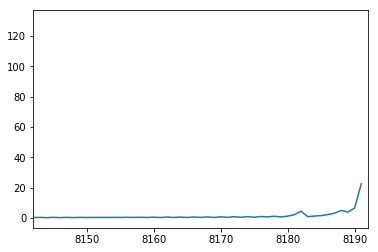

In [56]:
E = np.fft.fft(DAvg)
times = np.fft.fftfreq(len(E),)
plt.plot(abs(E)*2)
plt.xlim(len(E)-50,len(E))


In [57]:


def Fourier_Filter(data):
    p1 = 50
    p2 = 100
    n1 = len(data)-p2
    n2 = len(data)-p1
    FtData = np.fft.fft(data)
    
    FtData[p1:p2] = 0
    FtData[n1:n2] = 0
    
    return np.fft.fft(FtData)

/Users/costassoler/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


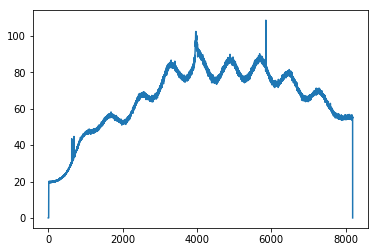

In [58]:
plt.plot(np.fft.fft(E))

/Users/costassoler/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


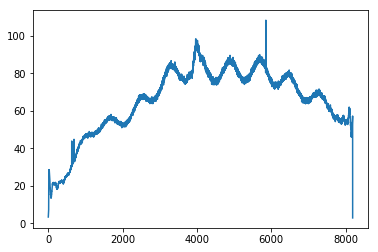

In [59]:
attempt = Fourier_Filter(DAvg)
plt.plot(attempt)

# Map Data Optimize

In [60]:
from scipy import optimize as opt
def BaseCurve(x,a,b,c):
    return a*(x**2)+b*x+c

def filtration(xdata,ydata):
    
    params,params_covariance = opt.curve_fit(BaseCurve,xdata,ydata)
    Background = BaseCurve(xdata,params[0],params[1],params[2])
    cal = ydata-Background
    m = np.mean(cal)
    for i in range (0,len(cal)):
        if (cal[i]<m+0.001):
            cal[i]=0
    cal[5500:6000]=0 #for leuschner observations 2019
    return cal

/Users/costassoler/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


5.419377654742707

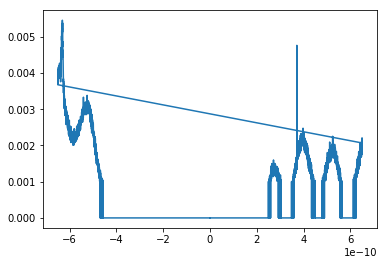

In [68]:
ydata = DAvg
xdata = np.arange(0,len(ydata))
xdata= np.fft.fftfreq(len(ydata),(768*10**6))
Filt = filtration(xdata,ydata)

plt.plot(xdata,Filt)
np.sum(Filt)

In [36]:
70*4

280

In [41]:
li = -10
lsteps = 70
bi = -20
bsteps = 21

#L=lf-li
#B = bf-bi

MAP = np.zeros((bsteps,lsteps))
pixels=0
for j in range (0,lsteps):
    
    for i in range(0,bsteps):
        l = str(j*4+li)
        b = str(i*2+bi)
        #print(l,b)
    
        try:
            
            Data = pyfits.open('TestMap_'+l+'.0_'+b+'.0.fits')
            
            D = np.array([])
           

            for k in range (1,11):
                D = np.append(D, Data[k].data['auto0_real'])
    
            D.shape = (10,-1)
            

            ydata = D.mean(0)
            
            
            
            xdata = np.arange(0,len(ydata))
            
            
            Filt = filtration(xdata,ydata)
            #print('hi')
            
            #plt.plot(Filt)
            pix = np.sum(Filt)
            MAP[i,j] = pix
            #print(MAP[i,j])
            pixels+=1
            #print(i,j)
            #print(pixels)
        except:
            continue
print('batch1 done!')
#next mapping session:
for j in range (0,lsteps):
    
    for i in range(0,bsteps):
        l = str(j*4+li)
        b = str(i*2+bi)
        #print(l,b)
    
        try:
            
            Data = pyfits.open('newTestMap_'+l+'.0_'+b+'.0.fits')
            
            D = np.array([])
           

            for k in range (1,11):
                D = np.append(D, Data[k].data['auto0_real'])
    
            D.shape = (10,-1)
            

            ydata = D.mean(0)
            
            
            
            xdata = np.arange(0,len(ydata))
            
            
            Filt = filtration(xdata,ydata)
            #print('hi')
            
            #plt.plot(Filt)
            pix = np.sum(Filt)
            MAP[i,j] = pix
            #print(MAP[i,j])
            pixels+=1
            #print(i,j)
            #print(pixels)
        except:
            continue
print('batch2 done!')
#next batch:
for j in range (0,lsteps):
    
    for i in range(0,bsteps):
        l = str(j*4+li)
        b = str(i*2+bi)
        #print(l,b)
    
        try:
            
            Data = pyfits.open('newnewTestMap_'+l+'.0_'+b+'.0.fits')
            
            D = np.array([])
           

            for k in range (1,11):
                D = np.append(D, Data[k].data['auto0_real'])
    
            D.shape = (10,-1)
            

            ydata = D.mean(0)
            
            
            
            xdata = np.arange(0,len(ydata))
            
            
            Filt = filtration(xdata,ydata)
            #print('hi')
            
            #plt.plot(Filt)
            pix = np.sum(Filt)
            MAP[i,j] = pix
            #print(MAP[i,j])
            pixels+=1
            #print(i,j)
            #print(pixels)
        except:
            continue
print('batch3 done!')

batch1 done!
batch2 done!
batch1 done!


In [44]:
for j in range (0,lsteps):
    
    for i in range(0,bsteps):
        l = str(j*4+li)
        b = str(i*2+bi)
        print(l,b)

-10 -20
-10 -18
-10 -16
-10 -14
-10 -12
-10 -10
-10 -8
-10 -6
-10 -4
-10 -2
-10 0
-10 2
-10 4
-10 6
-10 8
-10 10
-10 12
-10 14
-10 16
-10 18
-10 20
-6 -20
-6 -18
-6 -16
-6 -14
-6 -12
-6 -10
-6 -8
-6 -6
-6 -4
-6 -2
-6 0
-6 2
-6 4
-6 6
-6 8
-6 10
-6 12
-6 14
-6 16
-6 18
-6 20
-2 -20
-2 -18
-2 -16
-2 -14
-2 -12
-2 -10
-2 -8
-2 -6
-2 -4
-2 -2
-2 0
-2 2
-2 4
-2 6
-2 8
-2 10
-2 12
-2 14
-2 16
-2 18
-2 20
2 -20
2 -18
2 -16
2 -14
2 -12
2 -10
2 -8
2 -6
2 -4
2 -2
2 0
2 2
2 4
2 6
2 8
2 10
2 12
2 14
2 16
2 18
2 20
6 -20
6 -18
6 -16
6 -14
6 -12
6 -10
6 -8
6 -6
6 -4
6 -2
6 0
6 2
6 4
6 6
6 8
6 10
6 12
6 14
6 16
6 18
6 20
10 -20
10 -18
10 -16
10 -14
10 -12
10 -10
10 -8
10 -6
10 -4
10 -2
10 0
10 2
10 4
10 6
10 8
10 10
10 12
10 14
10 16
10 18
10 20
14 -20
14 -18
14 -16
14 -14
14 -12
14 -10
14 -8
14 -6
14 -4
14 -2
14 0
14 2
14 4
14 6
14 8
14 10
14 12
14 14
14 16
14 18
14 20
18 -20
18 -18
18 -16
18 -14
18 -12
18 -10
18 -8
18 -6
18 -4
18 -2
18 0
18 2
18 4
18 6
18 8
18 10
18 12
18 14
18 16
18 18
18 20
22 -2

266 14
266 16
266 18
266 20


In [42]:
pixels

761

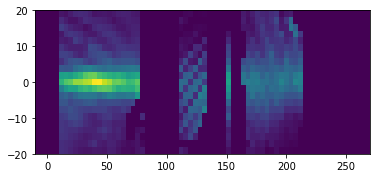

<Figure size 216x2160 with 0 Axes>

In [43]:
plt.imshow(MAP,aspect=3,extent=[-10,270,-20,20])
plt.figure(figsize=(3,30))
plt.savefig('Map1.pdf')

In [188]:
MAP.shape

(21, 70)

In [196]:
63*4

252

In [195]:
plt.imshow??

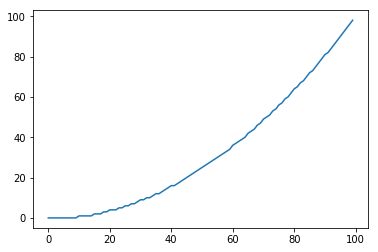

In [208]:
x = np.arange(0,100)
y = x**2//100

plt.plot(x,y)

# Top Down Map (b = 0):

In [ ]:
N = 100
M = 100
CentI
kpc = 3.086*10**19 #meters/kpc
image=np.zeros((N,M))
Long = np.arange(-10,260)

V0 = 200 #km/s
V1 = 0
ScaleD = (10/50)*kpc #meters per pixel
R0i = 7.9*kpc//ScaleD+CentI
R0j
for l in range (0,N):
    vels = 
    DATA = 
    i_inc = np.cos(Long(l))
    j_inc = np.sin(Long(l))
    
    for i in range (0,N):
        for j in range(0,M):
            
            d = np.tan(0.5*(90-l)*np.pi/180)
            R1 = ScaleD((i-N//2)**2+(j-M//2)**2)**.5
            
            x = 
            
            
            
            vi = V0*(i-N//2)/R1
            vj = V0*(j-M//2)/R1
            V1 = 
            vc = V1-20*sin(l)
            vf = V1+20*sin(l)
            bright = 0
            for a in range (0,len(DATA)):
                if (vels[a]>vc) and (vels[a]<vf):
                    bright+=vels[a]
            image[i,j] = bright

    vprev = V1